In [2]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# sklearn for feature extraction & modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import joblib
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# Iteratively read files
import glob
import os

# For displaying images in ipython
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

In [3]:
df = pd.read_csv("../raw_data/reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
# Building Pipeline for raw text transformation
pp_nb = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

In [5]:
# Remove records with blank values
df_1 = df.dropna()
df_1.shape , df.shape

((568401, 10), (568454, 10))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_1["Summary"], df_1["Score"],random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((454720,), (113681,), (454720,))

In [7]:
model_nb = pp_nb.fit(X_train,y_train)

In [8]:
print("Accuracy of Naive Bayes Classifier is {}".format(model_nb.score(X_test,y_test)))

Accuracy of Naive Bayes Classifier is 0.7009790554270282


In [9]:
y_predicted = model_nb.predict(X_test)
y_predicted[0:10]

array([5, 5, 1, 5, 5, 5, 2, 5, 5, 5], dtype=int64)

In [10]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
#cnf_matrix

In [11]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 4978   125   170   235  5007]
 [ 1284   318   431   243  3661]
 [  687    84  1317   656  5716]
 [  319    22   238  1456 13991]
 [  452    29   140   503 71619]]
Normalized confusion matrix
[[4.73e-01 1.19e-02 1.62e-02 2.23e-02 4.76e-01]
 [2.16e-01 5.36e-02 7.26e-02 4.09e-02 6.17e-01]
 [8.12e-02 9.93e-03 1.56e-01 7.75e-02 6.76e-01]
 [1.99e-02 1.37e-03 1.49e-02 9.09e-02 8.73e-01]
 [6.21e-03 3.99e-04 1.92e-03 6.91e-03 9.85e-01]]


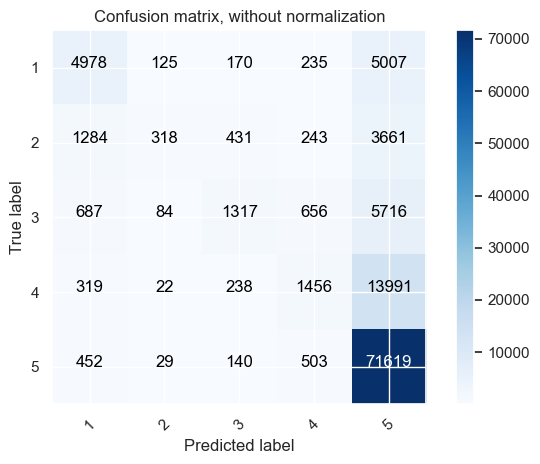

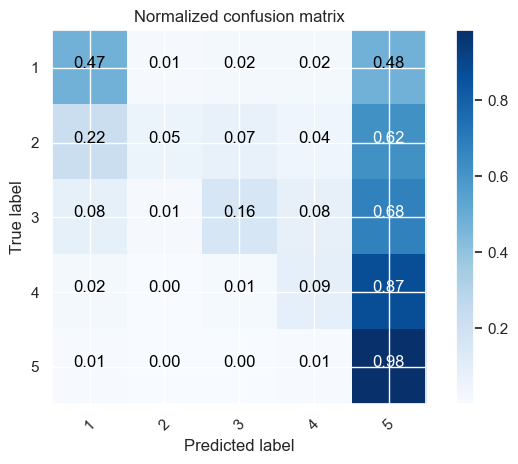

In [12]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4,5],
                      title='Confusion matrix, without normalization')
#With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [1,2,3,4,5] ,normalize=True,title='Normalized confusion matrix')

plt.show()

In [13]:
# Building Pipeline for raw text transformation
pp_rf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier(n_jobs= -1)),
    ])

In [14]:
model_rf = pp_rf.fit(X_train,y_train)

In [15]:
print("Accuracy of Random Forest Classifier is {}".format(model_rf.score(X_test,y_test)))

Accuracy of Random Forest Classifier is 0.7711314995469779


In [16]:
y_predicted = model_rf.predict(X_test)
y_predicted[0:10]

array([5, 2, 1, 5, 5, 3, 5, 5, 5, 5], dtype=int64)

In [17]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[ 7062   614   354   224  2261]
 [ 1196  2179   560   238  1764]
 [  707   457  3723   723  2850]
 [  369   169   592  5804  9092]
 [  851   323   629  2045 68895]]
Normalized confusion matrix
[[0.67 0.06 0.03 0.02 0.22]
 [0.2  0.37 0.09 0.04 0.3 ]
 [0.08 0.05 0.44 0.09 0.34]
 [0.02 0.01 0.04 0.36 0.57]
 [0.01 0.   0.01 0.03 0.95]]


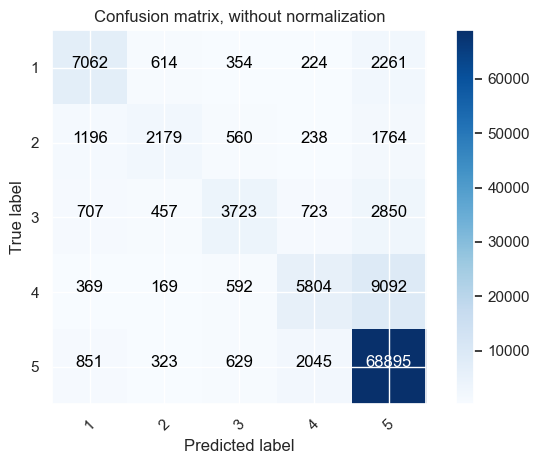

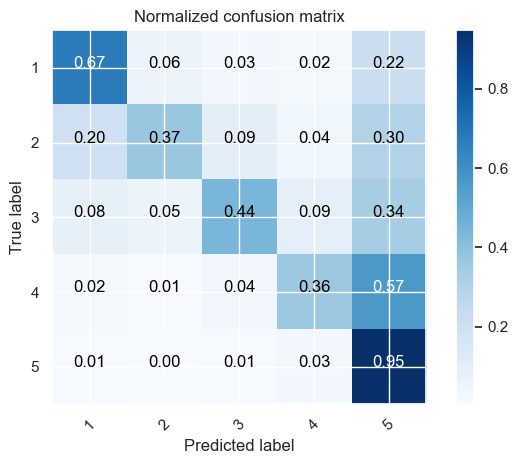

In [18]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4,5],
                      title='Confusion matrix, without normalization')
#With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [1,2,3,4,5] ,normalize=True,title='Normalized confusion matrix')

plt.show()

In [ ]:
from joblib import dump
dump(model_rf, './rating_predict/rating_model.joblib')

['rating_model.joblib']